In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_main = pd.read_csv('C:\\Users\\dilovar.mashrabov\\Desktop\\Junior Semester_2\\Data Science\\Project\data\\match_data.csv').drop('Unnamed: 0', axis=1)
df_heroes = pd.read_csv('C:\\Users\\dilovar.mashrabov\\Desktop\\Junior Semester_2\\Data Science\\Project\\data\\heros.csv').drop('Unnamed: 0', axis=1)

In [7]:
heroes_dire = df_main[df_main.columns[[i for i in range(21,35,3)]]]
heros_radiant = df_main[df_main.columns[[i for i in range(6,20,3)]]]
results = df_main['radiant_win']

In [27]:
radiant_health_damage = [[df_heroes[['health', 'damage']].values[df_heroes['id'] == b] for b in i] for i in heros_radiant.values]
dire_health_damage = [[df_heroes[['health', 'damage']].values[df_heroes['id'] == b] for b in i] for i in heroes_dire.values]

In [43]:
def sums(df):
    result = []
    for game in df:
        health = 0
        damage = 0
        for hero in game:
            health += hero[0][0]
            damage += hero[0][1]
        result.append([health, damage])
    return result

In [148]:
radiant_totals = pd.DataFrame(sums(radiant_health_damage), columns=['r_health', 'r_damage'])
dire_totals = pd.DataFrame(sums(dire_health_damage), columns=['d_health', 'd_damage'])

In [150]:
totals = pd.DataFrame()
totals['r_health'] = radiant_totals['r_health']
totals['r_damage'] = radiant_totals['r_damage']
totals['d_health'] = dire_totals['d_health']
totals['d_damage'] = dire_totals['d_damage']
totals['radiant_win'] = results

totals.corr()

,r_health,r_damage,d_health,d_damage,radiant_win
r_health,1.000000,0.396914,-0.054146,-0.001758,-0.108020
r_damage,0.396914,1.000000,0.001777,-0.049368,0.032395
d_health,-0.054146,0.001777,1.000000,0.341187,0.114223
d_damage,-0.001758,-0.049368,0.341187,1.000000,-0.033462
radiant_win,-0.108020,0.032395,0.114223,-0.033462,1.000000


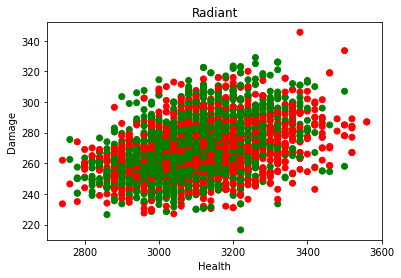

In [154]:
clr = []
for i in totals['radiant_win']:
    if i:
        clr.append('green')
    else:
        clr.append('red')

plt.title('Radiant')
plt.xlabel('Health')
plt.ylabel('Damage')
plt.scatter(totals['r_health'], totals['r_damage'], color = clr)
plt.show()

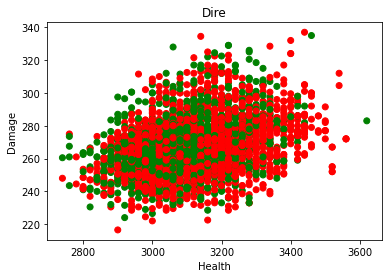

In [155]:
clr = []
for i in totals['radiant_win']:
    if i:
        clr.append('red')
    else:
        clr.append('green')

plt.title('Dire')
plt.xlabel('Health')
plt.ylabel('Damage')
plt.scatter(totals['d_health'], totals['d_damage'], color = clr)
plt.show()

In [87]:
from sklearn.model_selection import train_test_split
X = totals.iloc[:, :-1]
Y = totals['radiant_win']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(len(x_train), len(y_train), len(x_test), len(y_train))


3204 3204 802 3204


In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_param = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
              'criterion' :['gini', 'entropy'],
              "min_samples_split":[i for i in range(2,12)], 
              "min_samples_leaf": [i for i in range(2,12)]
             }
model = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(score)

0.5935162094763092


In [104]:
model.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 9}

Optimal 'Sample Split Size' is 10 and 'Optimal Leaf Samples' are 510. Best accuracy is 58.23%


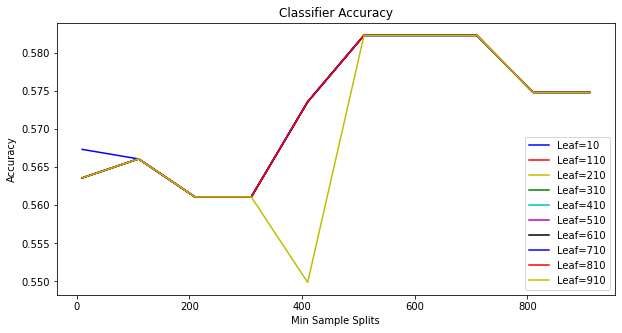

In [121]:
from sklearn.metrics import accuracy_score # To test accuracy

splits=np.arange(10,1000,100)
leafnodes=np.arange(10,1000,100) 

def DtreeIter(train_features,train_target,test_features,test_target,samplesplit,sampleleaf):
    treeOpt=DecisionTreeClassifier( criterion = "entropy",
                                    min_samples_split = samplesplit,
                                    min_samples_leaf = sampleleaf,
                                    max_depth = 4)
    treeOpt=treeOpt.fit(train_features,train_target)
    result_Opt=treeOpt.predict(test_features)
    return accuracy_score(test_target,result_Opt)

result_optimise=dict()
for values in splits:
    result_optimise[values]=list()
result_optimise=dict()
for values in splits:
    result_optimise[values]=list()

for values in splits:
    for nodes in leafnodes:
        result_optimise[values].append([DtreeIter(x_train,y_train,x_test,y_test,values,nodes)])

      
        
#To find out best parameters        
optimal_split=max(result_optimise, key=lambda x: result_optimise[x][1])
optimal_accuracy=max(result_optimise[optimal_split])
optimal_leaf=leafnodes[list(result_optimise[optimal_split]).index(optimal_accuracy)]
print("Optimal 'Sample Split Size' is %d and 'Optimal Leaf Samples' are %d. Best accuracy is %.2f%%" %(optimal_split,optimal_leaf,optimal_accuracy[0]*100))


plt.figure(figsize=(10,5))
plt.plot(splits,result_optimise[leafnodes[0]],'b',label='Leaf={}'.format(leafnodes[0]))
plt.plot(splits,result_optimise[leafnodes[1]],'r',label='Leaf={}'.format(leafnodes[1]))
plt.plot(splits,result_optimise[leafnodes[2]],'y',label='Leaf={}'.format(leafnodes[2]))
plt.plot(splits,result_optimise[leafnodes[3]],'g',label='Leaf={}'.format(leafnodes[3]))
plt.plot(splits,result_optimise[leafnodes[4]],'c',label='Leaf={}'.format(leafnodes[4]))
plt.plot(splits,result_optimise[leafnodes[5]],'m',label='Leaf={}'.format(leafnodes[5]))
plt.plot(splits,result_optimise[leafnodes[6]],'k',label='Leaf={}'.format(leafnodes[6]))
plt.plot(splits,result_optimise[leafnodes[7]],'b',label='Leaf={}'.format(leafnodes[7]))
plt.plot(splits,result_optimise[leafnodes[8]],'r',label='Leaf={}'.format(leafnodes[8]))
plt.plot(splits,result_optimise[leafnodes[9]],'y',label='Leaf={}'.format(leafnodes[9]))
plt.legend(loc=4)
plt.xlabel('Min Sample Splits')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.show()

In [147]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5910224438902744

adding team avg winrate to totals dataframe

In [ ]:
total_games = []
wins = []

hero_dict = {}
for i in df_heroes['id']:
    hero_dict[i] = 0

for game_index in range(len(df_main)):
    game = df_main[df_main.columns[[i for i in range(6,35,3)]]].iloc[game_index]
    for hero in game.values:
        hero_dict[hero]+=1

for hero in list(hero_dict.keys()):
    games = 0
    win = 0
    for i in range(len(df_main)):
        game = df_main.iloc[i].values[[i for i in range(6,35,3)]]
        radiant = game[:5]
        dire = game[5:]
        if hero in game:
            if hero in radiant and df_main.iloc[i].values[1] == True:
                win += 1
            if hero in dire and df_main.iloc[i].values[1] == False:
                win += 1
            games += 1
    total_games.append(games)
    wins.append(win)